In [4]:
import pickle
from GraphTsetlinMachine.graphs import Graphs
import numpy as np

with open('5x5__40_0.pkl', 'rb') as f:
    graphs_train, graphs_test, X_train, Y_train, X_test, Y_test = pickle.load(f)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from matplotlib.lines import Line2D
import numpy as np


In [73]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from matplotlib.lines import Line2D
import numpy as np

def draw_skewed_hexagonal_graph(gt, graph_id, board_size=5, filename='skewed_hexagonal.png'):
    """
    Draws a graph aligned in a skewed hexagonal grid with clean edges and hexagonal nodes.

    Args:
        gt: Graph object containing graph data.
        graph_id: ID of the graph to plot.
        board_size: Number of nodes along one dimension of the grid.
        filename: Name of the file to save the graph plot.
    """
    # Initialize graph and color mapping
    colorslist = cm.rainbow(np.linspace(0, 1, len(gt.edge_type_id)))
    G = nx.MultiDiGraph()

    # Adjust visible nodes
    visible_nodes = gt.number_of_graph_nodes[graph_id]
  
    # Add edges only for visible nodes
    for node_id in range(visible_nodes):
        for node_edge_num in range(gt.graph_node_edge_counter[gt.node_index[graph_id] + node_id]):
            edge_index = gt.edge_index[gt.node_index[graph_id] + node_id] + node_edge_num
            target_node = gt.edge[edge_index][0]
            if target_node < visible_nodes:  # Exclude edges to hidden nodes
                G.add_edge(str(node_id), str(target_node), weight=gt.edge[edge_index][1])

    # Define hexagonal skewed positions
    pos = {}
    grid_rows = (visible_nodes + board_size - 1) // board_size
    skew_offset = 0.5  # Horizontal offset for skew
    scale_factor = 1.5  # Adjust spacing for a clean layout

    for node_id in range(visible_nodes):
        row = node_id // board_size
        col = node_id % board_size
        pos[str(node_id)] = (col * scale_factor + row * skew_offset, -row)

    # Create the figure and adjust size
    plt.figure(figsize=(12, 8))  # Balanced size

    # Draw nodes and labels with hexagonal shape
    nx.draw_networkx_nodes(G, pos, node_size=900, node_shape='h', node_color="lightgray", edgecolors="black")
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

    # Draw edges with clean straight lines
    legend_elements = []
    for k in range(len(gt.edge_type_id)):
        eset = [
            (u, v) for (u, v, d) in G.edges(data=True) if int(d["weight"]) == k
        ]
        if not eset:  # Skip if no edges for this type
            continue
        # Lookup edge type name
        edge_label = next((key for key, val in gt.edge_type_id.items() if val == k), "Unknown")
        legend_elements.append(
            Line2D([0], [0], marker="o", color=colorslist[k], label=edge_label, lw=0)
        )
        nx.draw_networkx_edges(G, pos, edgelist=eset, edge_color=colorslist[k], width=1.5)

    # Add title and legend
    plt.title(f"Hex Graph {graph_id}")
    plt.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=12)
    plt.axis("off")  # Hide axes
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout for legend
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


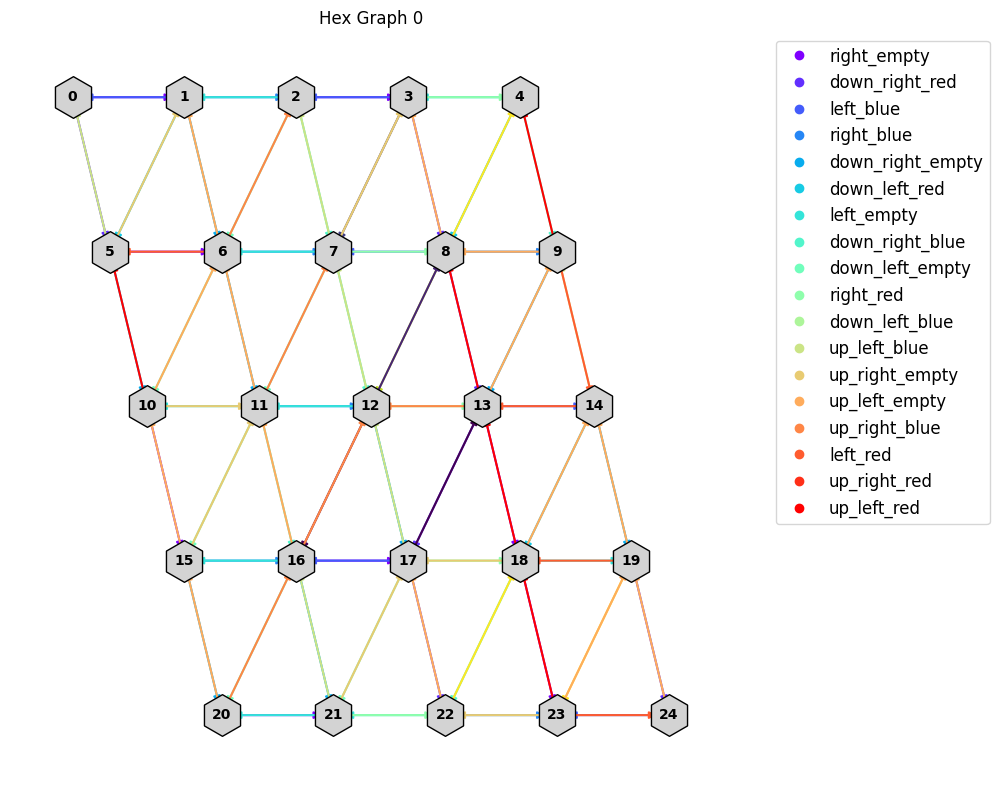

In [74]:
draw_skewed_hexagonal_graph(graphs_train, 0, board_size=5, filename='skewed_grid.png')